In [1]:
!sudo ls

Untitled.ipynb	work


In [24]:
!#apt-get install -y software-properties-common python-software-properties
!#sudo apt-add-repository ppa:mosquitto-dev/mosquitto-ppa
!#sudo apt-get update
!#sudo apt-get install -y mosquitto mosquitto-clients

!#pip install paho-mqtt
!#sudo apt-add-repository ppa:mosquitto-dev/mosquitto-ppa
!#sudo apt-get update
!#sudo apt-get install -y mosquitto

!sudo apt-get install -y systemd
!sudo systemctl enable mosquitto.service

E: Could not open lock file /var/lib/dpkg/lock - open (13: Permission denied)
E: Unable to lock the administration directory (/var/lib/dpkg/), are you root?
sudo: apt-add-repository: command not found
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done                     
Reading package lists... Done
Building dependency tree       
Reading state information... Done
mosquitto is already the newest version (1.4.15-2).
mosquitto-clients is already the newest version (1.4.15-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dbus dmsetup gir1.2-glib-2.0 libapparmor1 libargon2-0 libcap2
  libcryptse

Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../7-libapparmor1_2.12-4ubuntu5_amd64.deb ...
Unpacking libapparmor1:amd64 (2.12-4ubuntu5) ...
Selecting previously unselected package libkmod2:amd64.
Preparing to unpack .../8-libkmod2_24-1ubuntu3_amd64.deb ...
Unpacking libkmod2:amd64 (24-1ubuntu3) ...
Setting up libcap2:amd64 (1:2.25-1.2) ...
Setting up libargon2-0:amd64 (0~20161029-1.1) ...
Setting up libdevmapper1.02.1:amd64 (2:1.02.145-4.1ubuntu3) ...
Setting up libjson-c3:amd64 (0.12.1-1.3) ...
Setting up libcryptsetup12:amd64 (2:2.0.2-1ubuntu1) ...
Setting up libip4tc0:amd64 (1.6.1-2ubuntu2) ...
Selecting previously unselected package systemd.
(Reading database ... 118009 files and directories currently installed.)
Preparing to unpack .../systemd_237-3ubuntu10.3_amd64.deb ...
Unpacking systemd (237-3ubuntu10.3) ...
Setting up libapparmor1:amd64 (2.12-4ubuntu5) ...
Setting up libkmod2:amd64 (24-1ubuntu3) ...
Setting up systemd (237-3ubuntu10.3) ...


In [1]:
global badh, badt, badp, badl, maxtemp, maxhum, maxpress, maxlum
maxtemp = 0
maxhum = 0
maxpress = 0
maxlum = 0

badt = False
badh = False
badp = False
badl = False

<IPython.core.display.Javascript object>


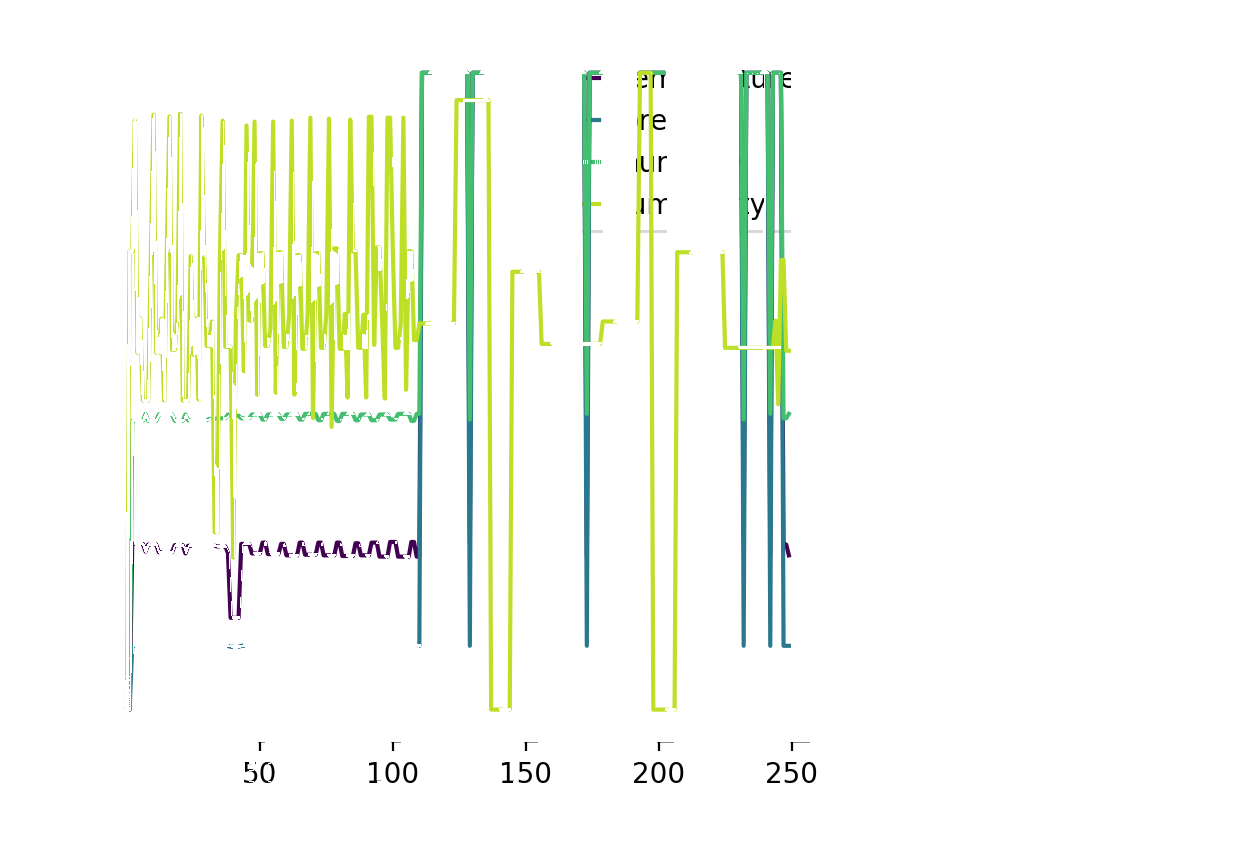

In [5]:
%matplotlib notebook
import threading
import ssl
import sys
import paho.mqtt.client
import json
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

fig = plt.figure()
plt.ion()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()

host.set_xlabel("dataframe")
par1.set_ylabel("temperature")
par2.set_ylabel("pressure")
par3.set_ylabel("humidity")
par4.set_ylabel("luminocity")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.4)
color3 = plt.cm.viridis(.7)
color4 = plt.cm.viridis(.9)


# right, left, top, bottom
#par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
#par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')



fig.patch.set_facecolor('red')
fig.show()
fig.canvas.draw()

p1Data = [0]
p2Data = [0]
p3Data = [0]
p4Data = [0]

dataTime = []
i = 0

def temperatureLimits(x):
    global maxtemp
    maxtemp = x
    return x

def pressureLimits(x):
    global maxpress
    maxpress = x
    return x

def humidityLimits(x):
    global maxhum
    maxhum = x
    return x

def luminocityLimits(x):
    global maxlum
    print("called!")
    print(maxlum)
    maxlum = x
    return x

def on_connect(client, userdata, flags, rc):
	print('connected (%s)' % client._client_id)
	client.subscribe(topic='[topic]', qos=2)

def on_message(client, userdata, message):
    global badh, badt, badp, badl, maxtemp, maxhum, maxpress, maxlum
    try:
        j = json.loads(message.payload)
        if(j['data']):
            s = j['data']
            #print(s)
            
            joined = True
            try:
                 if s['joined']:
                    pass
            except:
                joined = False
                
            if(joined):
                return;
                
            try: 
                t = s['temperature']
                print(t)
                p1Data.append(t)
                badt = t > maxtemp
            except KeyError: p1Data.append(p1Data[-1])
            
            try: 
                p = s['pressure']
                print(p)
                p2Data.append(p)
                badp = p > maxpress
            except KeyError: p2Data.append(p2Data[-1])
                    
            try: 
                h = s['humidity']
                print(h)
                p3Data.append(h)
                badh = h > maxhum
            except KeyError: p3Data.append(p3Data[-1])
            
                                
            try: 
                l = s['luminocity']
                print(l)
                p4Data.append(l)
                badl = l > maxlum
            except KeyError: p4Data.append(p4Data[-1])
            
            
            dataTime.append(++i)
            
            par1.clear()
            par2.clear()
            par3.clear()
            par4.clear()
            
            
            p1, = par1.plot(p1Data, color=color1,label="temperature")
            p2, = par2.plot(p2Data, color=color2,label="pressure")
            p3, = par3.plot(p3Data, color=color3,label="humidity")
            p4, = par4.plot(p4Data, color=color4, label="luminocity")
            
            par1.spines['right'].set_position(('outward', 0))   
            par2.spines['right'].set_position(('outward', 40))   
            par3.spines['right'].set_position(('outward', 80))   
            par4.spines['right'].set_position(('outward', 120))   
            par1.yaxis.label.set_color(p1.get_color())
            par2.yaxis.label.set_color(p2.get_color())
            par3.yaxis.label.set_color(p3.get_color())
            par4.yaxis.label.set_color(p4.get_color())
            
            par1.yaxis.set_label_position('left')
            par2.yaxis.set_label_position('left')
            par3.yaxis.set_label_position('left')
            par4.yaxis.set_label_position('left')
            
            lns = [p1, p2, p3, p4]
            host.legend(handles=lns, loc='best')
            
            if not badh and not badt and not badp and not badl:
                fig.patch.set_facecolor('red')
            else :
                fig.patch.set_facecolor('white')
    
            fig.tight_layout() 
            fig.canvas.draw()

    except KeyError:
        print("bad msg")
    
    #print('------------------------------')
    #print('topic: %s' % message.topic)
    #print(message.payload.decode("utf-8"))
    #print('qos: %d' % message.qos)
    
once = True
client  = paho.mqtt.client.Client(client_id='oj', userdata=None,  transport="mqtt")
def work(once, client):
    if once:
        once = False
        client.on_connect = on_connect
        client.on_message = on_message
        client.connect('192.168.1.129', 1883, 60)
        client.subscribe("#")
        client.loop_forever()
        
        


thread = threading.Thread(target=work, args=(once, client))
thread.start()


In [3]:
interact_manual(temperatureLimits, x=100);
interact_manual(pressureLimits, x=1000);
interact_manual(humidityLimits, x=1000);
interact_manual(luminocityLimits, x=1000);

interactive(children=(IntSlider(value=100, description='x', max=300, min=-100), Button(description='Run Intera…

interactive(children=(IntSlider(value=1000, description='x', max=3000, min=-1000), Button(description='Run Int…

interactive(children=(IntSlider(value=1000, description='x', max=3000, min=-1000), Button(description='Run Int…

interactive(children=(IntSlider(value=1000, description='x', max=3000, min=-1000), Button(description='Run Int…